In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from matplotlib import pyplot as plt
from sklearn import metrics

In [2]:
# read the data
preprocessed_data = pd.read_pickle('../data/preprocessed_twitter_Monika.pd')

# Create a dataframe
df = pd.DataFrame(preprocessed_data)
y = df['score'].copy()
df.drop('score', axis=1, inplace=True) 

In [3]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [4]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

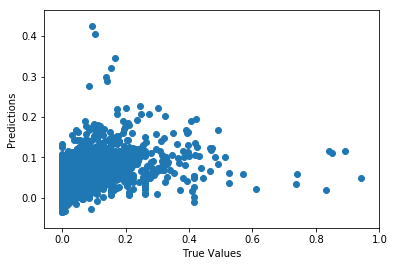

[  1.67438145e-11  -6.83141516e-05  -1.31756325e-02   1.83957604e+00
  -7.20211638e-04   1.62618139e-04  -5.00752576e-01   3.82573173e-01
   3.46349575e+01   9.89855460e-01  -4.75814898e-04   1.96811239e-04
   1.47675619e-04  -1.48316441e-05   1.10160093e-01  -4.75188875e-02
  -5.48130501e-02   9.35890719e-02  -5.70874012e+00  -3.11486377e+00
   2.63261610e-01  -1.84336415e-01  -3.55469899e+01   2.96572644e+01
   1.60678387e-07   2.17237616e-03  -1.77479739e-05   3.31657857e-04
  -1.43336195e-05   3.19770999e-05  -4.17318419e-06   2.39200154e-05]


In [5]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print(lm.coef_)

In [6]:
scores = cross_val_score(model, df, y, cv=10)
print("Cross-validated scores:", scores)

Cross-validated scores: [ 0.26309148  0.30968046  0.21827327  0.26236991  0.26555925  0.26415655
  0.26038629  0.23437251  0.19681893  0.15870014]


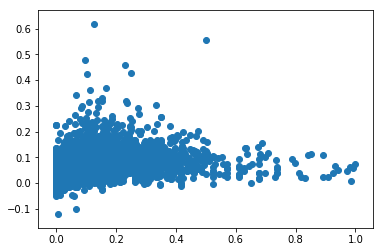

In [7]:
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)
plt.show()

In [8]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.232898741991


In [9]:
print(lm.coef_)

[  1.67438145e-11  -6.83141516e-05  -1.31756325e-02   1.83957604e+00
  -7.20211638e-04   1.62618139e-04  -5.00752576e-01   3.82573173e-01
   3.46349575e+01   9.89855460e-01  -4.75814898e-04   1.96811239e-04
   1.47675619e-04  -1.48316441e-05   1.10160093e-01  -4.75188875e-02
  -5.48130501e-02   9.35890719e-02  -5.70874012e+00  -3.11486377e+00
   2.63261610e-01  -1.84336415e-01  -3.55469899e+01   2.96572644e+01
   1.60678387e-07   2.17237616e-03  -1.77479739e-05   3.31657857e-04
  -1.43336195e-05   3.19770999e-05  -4.17318419e-06   2.39200154e-05]
